<Figure size 640x480 with 0 Axes>

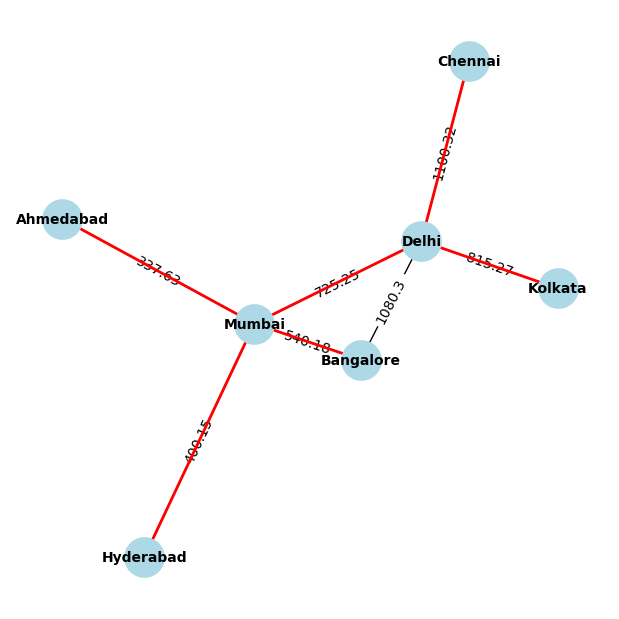

In [1]:
import tkinter as tk
from tkinter import ttk
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Expanded flight data with routes and multiple factors for each route
flight_data = {
    'Delhi': {
        'Mumbai': {'distance': 1150, 'fuel': 500, 'duration': 2.5, 'congestion': 0.7, 'weather': 0.9},
        'Bangalore': {'distance': 1740, 'fuel': 700, 'duration': 3.0, 'congestion': 0.6, 'weather': 0.8},
        'Kolkata': {'distance': 1300, 'fuel': 550, 'duration': 2.7, 'congestion': 0.5, 'weather': 0.9},
        'Chennai': {'distance': 1750, 'fuel': 750, 'duration': 3.2, 'congestion': 0.6, 'weather': 0.85},
    },
    'Mumbai': {
        'Delhi': {'distance': 1150, 'fuel': 500, 'duration': 2.5, 'congestion': 0.7, 'weather': 0.9},
        'Bangalore': {'distance': 840, 'fuel': 400, 'duration': 1.8, 'congestion': 0.5, 'weather': 0.8},
        'Hyderabad': {'distance': 620, 'fuel': 300, 'duration': 1.5, 'congestion': 0.4, 'weather': 0.85},
        'Ahmedabad': {'distance': 525, 'fuel': 250, 'duration': 1.3, 'congestion': 0.3, 'weather': 0.9},
    },
    # Additional cities and routes can be added similarly
}

# FlightRoutePlanner class to create the GUI and calculate optimal routes
class FlightRoutePlanner:
    def __init__(self):
        # Set up the main window
        self.window = tk.Tk()
        self.window.title("Flight Route Planner")
        self.window.geometry("1000x700")
        self.window.configure(bg="#f7f7f7")
        
        # Call function to create the user interface
        self.create_interface()
        self.window.mainloop()

    # Function to plot the graph with MST highlighted
    def plot_graph(self, G, mst_edges):
        # Layout for nodes
        pos = nx.spring_layout(G)
        plt.clf()  # Clear any previous figures
        plt.figure(figsize=(6, 6))
        
        # Draw nodes and labels
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold')
        
        # Get edge labels (weights) and draw them on the graph
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        
        # Draw MST edges in red for emphasis
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2)
        
        # Embed the plot into Tkinter interface
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    # Function to calculate the Minimum Spanning Tree (MST)
    def calculate_mst(self):
        # Initialize a NetworkX graph
        G = nx.Graph()
        
        # Add edges with calculated weights based on flight data
        for source, destinations in flight_data.items():
            for destination, factors in destinations.items():
                # Define weight as a combination of factors
                weight = factors['distance'] * 0.5 + factors['fuel'] * 0.3 + factors['duration'] * 0.1
                G.add_edge(source, destination, weight=weight)
        
        # Compute the MST using Kruskal's algorithm
        mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
        
        # List of edges in the MST
        mst_edges = list(mst.edges(data=False))
        
        # Call function to plot the graph with MST
        self.plot_graph(G, mst_edges)

    # Function to create the interface layout
    def create_interface(self):
        # Create a frame to hold the graph
        self.graph_frame = ttk.Frame(self.window)
        self.graph_frame.pack(expand=True, fill=tk.BOTH)

        # Header label
        header = tk.Label(self.window, text="Flight Route Planner", font=("Helvetica", 26), bg="#4a4e69", fg="white", pady=20)
        header.pack(fill=tk.X)

        # Main frame for the table and controls
        main_frame = ttk.Frame(self.window, padding=20, relief=tk.RAISED, borderwidth=2)
        main_frame.pack(expand=True, fill=tk.BOTH)

        # Label for flight data
        flight_label = tk.Label(main_frame, text="Flight Routes Data", font=("Arial", 18), fg="#22223b")
        flight_label.pack(pady=10)

        # Table columns for displaying flight data
        columns = ("Source", "Destination", "Distance", "Fuel", "Duration", "Congestion", "Weather")
        tree = ttk.Treeview(main_frame, columns=columns, show="headings", height=8)

        # Define column headings
        tree.heading("Source", text="Source")
        tree.heading("Destination", text="Destination")
        tree.heading("Distance", text="Distance (km)")
        tree.heading("Fuel", text="Fuel (L)")
        tree.heading("Duration", text="Duration (hrs)")
        tree.heading("Congestion", text="Congestion")
        tree.heading("Weather", text="Weather")

        # Set column width and center alignment for compact display
        tree.column("Source", width=100, anchor=tk.CENTER)
        tree.column("Destination", width=100, anchor=tk.CENTER)
        tree.column("Distance", width=100, anchor=tk.CENTER)
        tree.column("Fuel", width=70, anchor=tk.CENTER)
        tree.column("Duration", width=80, anchor=tk.CENTER)
        tree.column("Congestion", width=80, anchor=tk.CENTER)
        tree.column("Weather", width=80, anchor=tk.CENTER)

        # Populate the table with flight data from the dictionary
        for src, dests in flight_data.items():
            for dest, data in dests.items():
                tree.insert("", "end", values=(src, dest, data['distance'], data['fuel'], data['duration'], data['congestion'], data['weather']))

        tree.pack(pady=10, fill=tk.BOTH, expand=True)

        # Button to trigger MST calculation and display the graph
        calculate_btn = tk.Button(main_frame, text="Calculate Optimal Routes", font=("Arial", 14), bg="#4a4e69", fg="white", command=self.calculate_mst)
        calculate_btn.pack(pady=20)
        
        # Footer label
        footer = tk.Label(self.window, text="© 2024 Flight Planner | Designed with ❤️", font=("Arial", 12), bg="#4a4e69", fg="white", pady=10)
        footer.pack(fill=tk.X)

# Main function to initialize and run the application
if __name__ == "__main__":
    FlightRoutePlanner()
